In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from stats import mean
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clinical_data = pd.merge( clinical_trial_data, mouse_drug_data, on="Mouse ID", sort = False)

# Display the data table for preview

mouse_clinical_data.sort_values(['Timepoint','Metastatic Sites']).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
10,f932,0,45.0,0,Ketapril
11,g107,0,45.0,0,Ketapril
19,a457,0,45.0,0,Ketapril
22,c819,0,45.0,0,Ketapril


In [1]:
#Expected output:

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = mouse_clinical_data.groupby(['Drug','Timepoint'])
tumor_response_1 = tumor_response['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_response_2 = tumor_response_1.reset_index()

# Preview DataFrame
tumor_response_2

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [2]:
#Expected Output:

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_1 = tumor_response['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_volume_2 = tumor_volume_1.reset_index()
# Preview DataFrame
tumor_volume_2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [3]:
#Expected Output:

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_3 = tumor_volume_1.unstack(level=0)
# Preview that Reformatting worked
tumor_volume_3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_3 = tumor_response_1.unstack(level=0)
# Preview that Reformatting worked
tumor_response_3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
#Expected output:

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


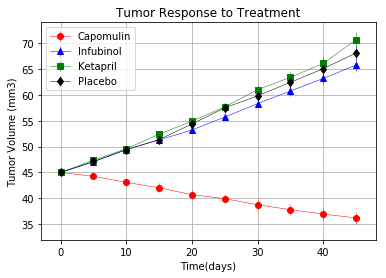

In [9]:
# Generate the Plot (with Error Bars)
tumor_res_map_1 = tumor_response_3['Capomulin']
tumor_res_map_2 = tumor_response_3['Infubinol']
tumor_res_map_3 = tumor_response_3['Ketapril']
tumor_res_map_4 = tumor_response_3['Placebo']

tumor_vol_map_1 = tumor_volume_3['Capomulin']
tumor_vol_map_2 = tumor_volume_3['Infubinol']
tumor_vol_map_3 = tumor_volume_3['Ketapril']
tumor_vol_map_4 = tumor_volume_3['Placebo']

time_map = tumor_response_3.index.tolist()

plt.errorbar(time_map, tumor_res_map_1, yerr= tumor_vol_map_1, marker="o", linewidth=0.5, color='red', label='Capomulin')
plt.errorbar(time_map, tumor_res_map_2, yerr= tumor_vol_map_2, marker="^", linewidth=0.5, color='blue', label='Infubinol')
plt.errorbar(time_map, tumor_res_map_3, yerr= tumor_vol_map_3, marker="s", linewidth=0.5, color='green', label='Ketapril')
plt.errorbar(time_map, tumor_res_map_4, yerr= tumor_vol_map_4, marker="d", linewidth=0.5, color='black', label='Placebo')

plt.xlim(-3,48)
plt.ylim(32,74)
plt.grid()
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time(days)")
plt.legend(loc='best')

# Save the Figure
plt.savefig("../Images/Tumor_Response_to_Treatment.png")

In [ ]:
# Show the Figure
plt.show()

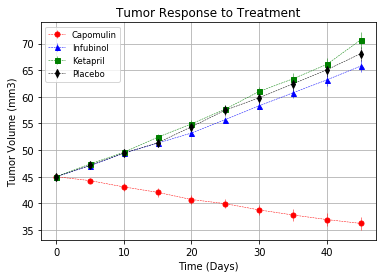

In [5]:
#Expected output:

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_metsite_1 = tumor_response['Metastatic Sites'].mean()
# Convert to DataFrame
tumor_metsite_2 = pd.DataFrame(tumor_metsite_1)
# Preview DataFrame
tumor_metsite_2.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [6]:
#Expected Output:

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Minor Data Munging to Re-Format the Data Frames
tumor_metsite_3 = tumor_metsite_1.unstack(level=0)
# Preview that Reformatting worked
tumor_metsite_3
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_metsite_4 = tumor_response['Metastatic Sites'].sem()
# Convert to DataFrame
tumor_metsite_5 = pd.DataFrame(tumor_metsite_4)
# Preview DataFrame
tumor_metsite_5.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [7]:
#Expected output:

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
tumor_metsite_6 = tumor_metsite_4.unstack(level=0)
# Preview that Reformatting worked
tumor_metsite_6.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [8]:
#Expected output:

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


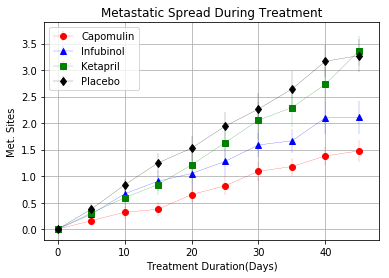

In [14]:
# Generate the Plot (with Error Bars)

tumor_met_map_1 = tumor_metsite_3['Capomulin']
tumor_met_map_2 = tumor_metsite_3['Infubinol']
tumor_met_map_3 = tumor_metsite_3['Ketapril']
tumor_met_map_4 = tumor_metsite_3['Placebo']

tumor_site_map_1 = tumor_metsite_6['Capomulin']
tumor_site_map_2 = tumor_metsite_6['Infubinol']
tumor_site_map_3 = tumor_metsite_6['Ketapril']
tumor_site_map_4 = tumor_metsite_6['Placebo']

time_metsite_map = tumor_metsite_3.index.tolist()


plt.errorbar(time_metsite_map, tumor_met_map_1, yerr= tumor_site_map_1, marker="o", linewidth=0.2, color='red', label='Capomulin')
plt.errorbar(time_metsite_map, tumor_met_map_2, yerr= tumor_site_map_2, marker="^", linewidth=0.2, color='blue', label='Infubinol')
plt.errorbar(time_metsite_map, tumor_met_map_3, yerr= tumor_site_map_3, marker="s", linewidth=0.2, color='green', label='Ketapril')
plt.errorbar(time_metsite_map, tumor_met_map_4, yerr= tumor_site_map_4, marker="d", linewidth=0.2, color='black', label='Placebo')

plt.xlim(-2,48)
plt.ylim(-0.2,3.9)
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration(Days)")
plt.legend(loc='best')

# Save the Figure
plt.savefig("../Images/Metastatic_Spread_During_Treatment.png")
# Show the Figure
plt.show()

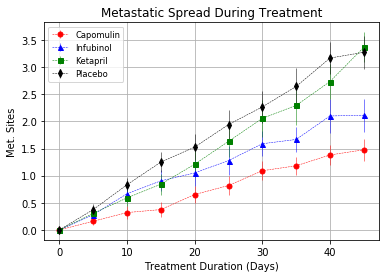

In [9]:
#Expected output:

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survive_mouse_1 = tumor_response['Mouse ID'].count()

# Convert to DataFrame
survive_mouse_2 = pd.DataFrame(survive_mouse_1.reset_index())
# Preview DataFrame
survive_mouse_2.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [10]:
#Expected output:

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
survive_mouse_3 = survive_mouse_1.unstack(level=0)            
# Preview the Data Frame
survive_mouse_3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [11]:
#Expected output:

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
survive_mouse= (survive_mouse_3/survive_mouse_3.loc[0,:])*100
survive_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


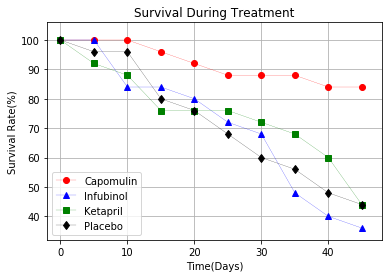

In [18]:
# Generate the Plot (Accounting for percentages)
survive_1 = survive_mouse['Capomulin']
survive_2 = survive_mouse['Infubinol']
survive_3 = survive_mouse['Ketapril']
survive_4 = survive_mouse['Placebo']

time_survive = survive_mouse_3.index.tolist()

plt.plot(time_survive, survive_1, marker="o", linewidth=0.2, color='red', label='Capomulin')
plt.plot(time_survive, survive_2, marker="^", linewidth=0.2, color='blue', label='Infubinol')
plt.plot(time_survive, survive_3, marker="s", linewidth=0.2, color='green', label='Ketapril')
plt.plot(time_survive, survive_4, marker="d", linewidth=0.2, color='black', label='Placebo')

plt.xlim(-2,48)
plt.ylim(32,106)
plt.grid()
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate(%)")
plt.xlabel("Time(Days)")
plt.legend(loc='best')




# Save the Figure
plt.savefig("../Images/Survival_During_Treatment.png")
# Show the Figure
plt.show()

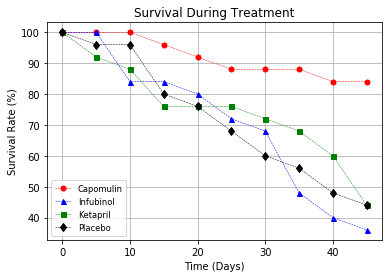

In [12]:
#Expected output:

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
percent_drug_change = ((tumor_response_1.loc[:,45] - tumor_response_1.loc[:,0])/tumor_response_1.loc[:,0]) * 100

# Display the data to confirm
percent_drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Expected output:

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

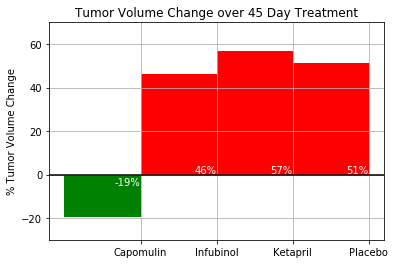

In [24]:
# Store all Relevant Percent Changes into a Tuple
                       
#print(type(percent_drug_change))      
new_percent = percent_drug_change[['Capomulin','Infubinol','Ketapril','Placebo']]
#percent_change_tuple = tuple(zip(new_percent,new_percent.index))
percent_change_tuple = new_percent
#print(percent_change_tuple)
#print(type(percent_change_tuple))
# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Volume Change over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color = 'black') 
xlabels = percent_change_tuple.index
#print(xlabels)
#print(np.arange(len(xlabels)))

plt.xticks(np.arange(len(xlabels)), xlabels)


plt.bar(np.arange(4), 
        percent_change_tuple, align='edge', width= -1 ,
         color = ['red' if percent_change_tuple[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

# Use functions to label the percentages of changes
count = 0

for r in percent_change_tuple:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(int(round(r, 0))) + '%', horizontalalignment='right',verticalalignment='center', alpha=2, color = 'white')
    count += 1
plt.grid()
plt.ylim(-30,70,20)
# Save the Figure
plt.savefig("../Images/Tumor_Volume_Change_over_45_Day_Treatment.png")
# Show the Figure
plt.show()

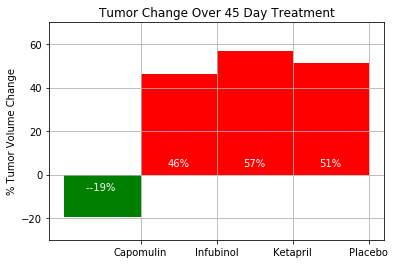

In [14]:
#Expected output: